<a href="https://colab.research.google.com/github/hanseul1215/ESAA_study/blob/master/%ED%95%B8%EC%A6%88%EC%98%A8_3_14_%EB%B6%84%EB%A5%98_%EC%97%B0%EC%8A%B5%EB%AC%B8%EC%A0%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [2]:
X, y = mnist["data"], mnist["target"]
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [46]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
params = {
    'weights' :['uniform', 'distance'],
    'n_neighbors' : [3, 5]
}

knn_clf = KNeighborsClassifier()
grid = GridSearchCV(knn_clf, param_grid=params, cv=3, refit=True)
grid.fit(X_train, y_train)



GridSearchCV(cv=3, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5],
                         'weights': ['uniform', 'distance']})

In [47]:
from sklearn.metrics import accuracy_score
best = grid.best_estimator_
pred = best.predict(X_test)
pred

array(['7', '2', '1', ..., '4', '5', '6'], dtype=object)

In [11]:
grid.best_score_

0.9693333333333333

In [14]:
accuracy_score(y_test, pred)

0.9717

## 2번

In [12]:
from scipy.ndimage.interpolation import shift

In [18]:
def move(image,i):
  shift(image, [i,i], cval=0)

shift(X_train, [1,0], cval=0) 

array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 2.48449243e-64, -7.70528131e-63, -1.92600635e-62, ...,
        -5.80106109e-38,  3.20309856e-39,  0.00000000e+00],
       [-7.55445204e-63, -2.89414183e-62, -1.17335544e-61, ...,
         2.03037138e-37,  6.51962879e-38,  0.00000000e+00],
       ...,
       [-6.10141129e-58, -1.10596092e-57, -1.15341711e-56, ...,
        -2.55851327e-46,  1.14573704e-47,  0.00000000e+00],
       [-1.11307569e-57, -1.15331995e-56, -5.47120086e-56, ...,
        -6.68730724e-47,  8.62625561e-47,  0.00000000e+00],
       [-7.46374004e-56,  2.40269729e-55, -9.00460725e-55, ...,
        -2.40385961e-47,  7.50157662e-48,  0.00000000e+00]])

In [38]:
def shift_image(image, dx, dy):
    image = image.reshape((28, 28))
    shifted_image = shift(image, [dy, dx], cval=0, mode="constant")
    return shifted_image.reshape([-1])

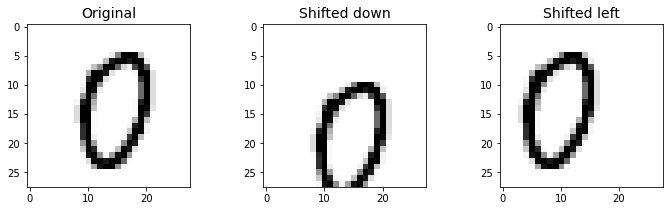

In [39]:
import matplotlib.pyplot as plt
image = X_train.to_numpy()[1000]
shifted_image_down = shift_image(image, 0, 5)
shifted_image_left = shift_image(image, -5, 0)

plt.figure(figsize=(12,3))
plt.subplot(131)
plt.title("Original", fontsize=14)
plt.imshow(image.reshape(28, 28), interpolation="nearest", cmap="Greys")
plt.subplot(132)
plt.title("Shifted down", fontsize=14)
plt.imshow(shifted_image_down.reshape(28, 28), interpolation="nearest", cmap="Greys")
plt.subplot(133)
plt.title("Shifted left", fontsize=14)
plt.imshow(shifted_image_left.reshape(28, 28), interpolation="nearest", cmap="Greys")
plt.show()

In [40]:
X_train_augmented = [image for image in X_train]
y_train_augmented = [label for label in y_train]

In [43]:
for dx, dy in ((1, 0), (-1, 0), (0, 1), (0, -1)):
    for image, label in zip(X_train.values, y_train):
        X_train_augmented.append(shift_image(image, dx, dy))
        y_train_augmented.append(label)

In [44]:
import numpy as np
X_train_augmented = np.array(X_train_augmented)
y_train_augmented = np.array(y_train_augmented)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  


In [45]:
shuffle_idx = np.random.permutation(len(X_train_augmented))
X_train_augmented = X_train_augmented[shuffle_idx]
y_train_augmented = y_train_augmented[shuffle_idx]
knn_clf = KNeighborsClassifier(**grid_search.best_params_)
knn_clf.fit(X_train_augmented, y_train_augmented)

NameError: ignored

In [ ]:
y_pred = knn_clf.predict(X_test)
accuracy_score(y_test, y_pred)